In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k5LvHek09pAXOx7Dn5d3")
project = rf.workspace("xiuqizheng-outlook-com").project("barcode-detection-buaq8")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9e7ba5f43ca366fcdf7cc1ff59f5a87b6f82bb6e32d68996dba86391d91b5765
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Barcode-Detection-1 in yolov5pytorch:: 100%|██████████| 1512/1512 [00:00<00:00, 2733.47it/s]


In [ ]:
%cd yolov5
!python train.py --img 416 --batch 32 --epochs 50 --data /content/yolov5/Barcode-Detection-1/data.yaml --weights yolov5s.pt

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Barcode-Detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0,

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 


[Errno 2] No such file or directory: '/usr/local/lib/python3.9/dist-packages/pyparsing-3.0.9.dist-info/METADATA'


Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


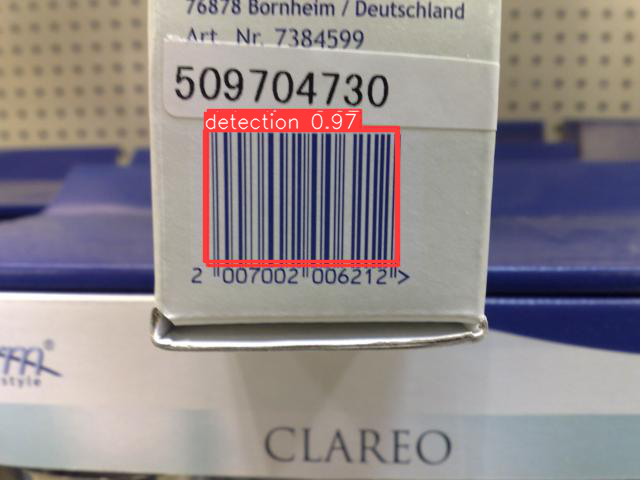

In [ ]:

import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/yolov5/runs/train/exp/weights/best.pt', force_reload = True)
im = '/content/trial2.jpg'
results = model(im)  # inference
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.


In [ ]:
im = '/content/edited.png'
results = model(im)  # inference

In [ ]:
results.xyxy[0][0]

tensor([315.52612, 291.69775, 650.24310, 475.14008,   0.96266,   0.00000], device='cuda:0')

In [ ]:
import cv2
import numpy as np
img = cv2.imread(im)

In [ ]:
img = img[291 : 475, 315: 650]

In [ ]:
cord_thres = results.xyxy[0][0]
print(int(cord_thres[0]))
for i,box in enumerate(cord_thres):
      x_min = int(box[0])
      y_min = int(box[1])
      x_max = int(box[2])
      y_max = int(box[3])
      image2 = img.astype(np.uint8)
      cropped_image = image2[y_min:y_max,x_min:x_max]
      
      
      cv2.imwrite("image.jpg", cropped_image) 

204


IndexError: ignored

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

error: ignored